Laboratorio 4

Práctica 1

Autores: Raúl Jiménez Juárez 
         Beatriz Magán Pinto
         David Alonso Rodríguez Lepina 
         Andrés Felipe Sánchez Patarroyo
         
Asignatura: Aprendizaje estadístico & Data Mining

Fecha: 23 de noviembre de 2019

Objetivo: Una tienda online de venta de cerveza quiere hacer un estudio de mercado. En el país donde opera hay problemas con los envíos debido a su extensión, se quiere implementar un sistema que pueda predecir varios parámetros. Algunos de ellos pueden influir en el consumo y por lo tanto en las ganancias y el stock del almacén. 

Para cada uno de los siguientes casos: calcula y establece que tipo de relación hay entre las variables, dibuja un diagrama de dispersión con los casos en el que también se incluya el modelo obtenido y por último haz una predicción con varios datos.

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Cargamos y preprocesamos los datos

In [2]:
#Cargamos el csv con los datos Consumo_cerveza.csv y lo guardamos en la variable df_consumo_cerva
df_consumo_cerveza = pd.read_csv("Consumo_cerveza.csv")

#Eliminamos las filas con campos sin información. 
df_consumo_cerveza = df_consumo_cerveza.dropna()

#Reemplazamos la coma por el punto en las columnas del dataframe con el objetivo de facilitar el tratamiento y procesamiento
#de los datos. 
for i in range(len(df_consumo_cerveza)):
    df_consumo_cerveza["Temperatura Media (C)"].loc[i] = str(df_consumo_cerveza["Temperatura Media (C)"].loc[i]).replace(",", ".")
    df_consumo_cerveza["Temperatura Minima (C)"].loc[i] = str(df_consumo_cerveza["Temperatura Minima (C)"].loc[i]).replace(",", ".")
    df_consumo_cerveza["Temperatura Maxima (C)"].loc[i] = str(df_consumo_cerveza["Temperatura Maxima (C)"].loc[i]).replace(",", ".")
    df_consumo_cerveza["Precipitaciones (mm)"].loc[i] = str(df_consumo_cerveza["Precipitaciones (mm)"].loc[i]).replace(",", ".")

C:\Users\Raul\Anaconda3\envs\keras-gpu\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
df_consumo_cerveza.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitaciones (mm),Fin de Semana,Consumo de cerveza (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


## Vamos a aplicar el algoritmo de regresión lineal simple. 

El objetivo de la regresión lineal simple es obtener estimaciones razonables de Y para distintos valores de X a partir de una muestra de n pares de valores. 
Evaluaremos las variables de temperatura mínima, máxima, precipitaciones y número de fines de semana. 
En nuestro problema, la variableY es el número de litros de cerveza consumidos y la variableX, la temperatura mínima, máxima, precipitaciones y número de fines de semana. Cada uno de estos elementos, los vamos a explicar en el desarrollo siguiente. 

In [4]:
#1º: La temperatura que hace durante el día está relacionada con el consumo de cerveza. 
#Utiliza el archivo Consumo_cerveza.csv para poder calcular cuantos litros se consumen. 
#Primero según la temperatura mínima del día. 

#Guardamos en la variableX los datos relativos a la columna sobre la temperatura mínima y hacemos un reshape para transformar 
#cada elemento en un array. 
variableX = np.array(df_consumo_cerveza["Temperatura Minima (C)"]).reshape(-1, 1).astype(np.float)
#Guardamos en la variableY el consumo de cerveza en litros como tipo float.
variableY = df_consumo_cerveza["Consumo de cerveza (litros)"].values.astype(np.float)
                     
#Definimos el conjunto de entrenamiento y validación. El 20% de nuestros datos son para validación. 
variableX_train, variableX_test, variableY_train, variableY_test  = train_test_split(variableX, variableY, test_size = 0.2, random_state = 42)

#Instanciamos el modelo de regresión lineal. 
modelo_regresion = linear_model.LinearRegression()
#Entrenamos el modelo con el conjunto de datos de entrenamiento. 
modelo_fitTmin = modelo_regresion.fit(variableX_train, variableY_train)

Coeficiente tras realizar la regresión según la variable de temperatura mínima: 
 [0.5877326]
Término independiente: 
 14.995073783511465
Error cuadrático medio: 
 19.900808193345092
Porcentaje de varianza: 
 0.10191171425626366


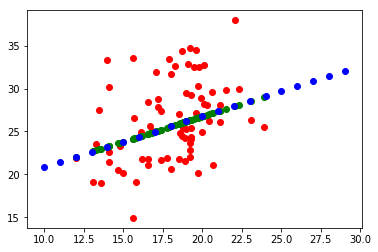

In [5]:
#Predicción con varios datos.
prediccion_variableY_Tmin = modelo_regresion.predict(variableX_test)  
print("Coeficiente tras realizar la regresión según la variable de temperatura mínima: \n", modelo_regresion.coef_)                     
print("Término independiente: \n", modelo_regresion.intercept_)                    
print("Error cuadrático medio: \n", mean_squared_error(variableY_test, prediccion_variableY_Tmin))    
print("Porcentaje de varianza: \n", r2_score(variableY_test, prediccion_variableY_Tmin))

#Diagrama de dispersión con los casos en el que también se incluya el modelo obtenido 
plt.scatter(variableX_test.reshape(1, len(variableX_test))[0], variableY_test, color = 'red')
plt.scatter(variableX_test.reshape(1, len(variableX_test))[0], prediccion_variableY_Tmin, color = 'green')

valores_X_recta = np.arange(10, 30)
valores_Y_recta = valores_X_recta * modelo_regresion.coef_ + modelo_regresion.intercept_
plt.scatter(valores_X_recta, valores_Y_recta, color = 'blue')

plt.show()

### La recta de regresión obtenida a través de los valores del coeficiente y término independiente es: 

                                            Y = β0X + β1 

                                        Y = 0.587X + 14.995

Para obtener la relación entre las variables, usamos los valores obtenidos relativos a: coeficiente y término independiente para obtener la ecuación de la recta de regresión. 
Tipo de relación entre las variables: puesto que el valor del coeficiente de regresión es 0.587 y está más cerca de 1, podemos decir que la relación entre las variables es lineal positiva, esto significa que al aumentar una variable, aumenta la otra.  
                               
                                       

In [6]:
#Después según la temperatura máxima. ¿Que diferencias hay entre los modelos?
variableX = np.array(df_consumo_cerveza["Temperatura Maxima (C)"]).reshape(-1, 1)
variableY = df_consumo_cerveza["Consumo de cerveza (litros)"].values
                     
variableX_train, variableX_test, variableY_train, variableY_test  = train_test_split(variableX, variableY, test_size = 0.2, random_state = 42)

modelo_regresion = linear_model.LinearRegression()
modelo_fitTmax = modelo_regresion.fit(variableX_train, variableY_train)

In [7]:
#Tipo de relación entre las variables.

#Diagrama de dispersión con los casos en el que también se incluya el modelo obtenido 

#Predicción con varios datos.
prediccion_variableY_Tmax = modelo_regresion.predict(variableX_test)  
print("\nCoeficiente tras realizar la regresión según la variable de temperatura máxima: \n", modelo_regresion.coef_)                     
print("Término independiente: \n", modelo_regresion.intercept_)                    
print("Error cuadrático medio: \n", mean_squared_error(variableY_test, prediccion_variableY_Tmax))    
print("Porcentaje de varianza: \n", r2_score(variableY_test, prediccion_variableY_Tmax))


Coeficiente tras realizar la regresión según la variable de temperatura máxima: 
 [0.63376681]
Término independiente: 
 8.402384357021003
Error cuadrático medio: 
 13.752758552219206
Porcentaje de varianza: 
 0.37936232376028123


### La recta de regresión obtenida a través de los valores del coeficiente y término independiente es: 

                                            Y = β0X + β1 

                                        Y = 0.633X + 8.402

Para obtener la relación entre las variables, usamos los valores obtenidos relativos a: coeficiente y término independiente para obtener la ecuación de la recta de regresión. 
Tipo de relación entre las variables: puesto que el valor del coeficiente de regresión es 0.633 y está más cerca de 1, podemos decir que la relación entre las variables es lineal positiva, esto significa que al aumentar una variable, aumenta la otra.  
                 

Coeficiente tras realizar la regresión según la variable de precipitaciones: 
 [-0.06379283]
Término independiente: 
 25.50236705573209
Error cuadrático medio: 
 22.2602018988775
Porcentaje de varianza: 
 -0.0045635518640712025


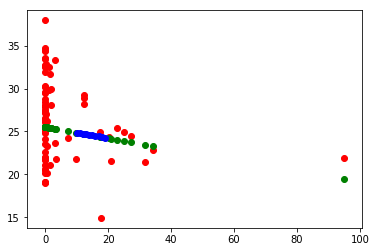

In [8]:
#2º: Se puede estimar que los días de lluvia también afectan en el consumo de cerveza. 
#Utiliza el mismo archivo para poder calcular el consumo con respecto a las precipitaciones.
variableX = np.array(df_consumo_cerveza["Precipitaciones (mm)"]).reshape(-1, 1).astype(np.float)
variableY = df_consumo_cerveza["Consumo de cerveza (litros)"].values.astype(np.float)
                     
variableX_train, variableX_test, variableY_train, variableY_test  = train_test_split(variableX, variableY, test_size = 0.2, random_state = 42)

modelo_regresion = linear_model.LinearRegression()
modelo_fitPrecipitaciones = modelo_regresion.fit(variableX_train, variableY_train)

#Predicción con varios datos.
prediccion_variableY_Precipitaciones = modelo_regresion.predict(variableX_test)  
print("Coeficiente tras realizar la regresión según la variable de precipitaciones: \n", modelo_regresion.coef_)                     
print("Término independiente: \n", modelo_regresion.intercept_)                    
print("Error cuadrático medio: \n", mean_squared_error(variableY_test, prediccion_variableY_Precipitaciones))    
print("Porcentaje de varianza: \n", r2_score(variableY_test, prediccion_variableY_Precipitaciones))

#Diagrama de dispersión con los casos en el que también se incluya el modelo obtenido 
plt.scatter(variableX_test.reshape(1, len(variableX_test))[0], variableY_test, color = 'red')
plt.scatter(variableX_test.reshape(1, len(variableX_test))[0], prediccion_variableY_Precipitaciones, color = 'green')

valores_X_recta = np.arange(10, 20)
valores_Y_recta = valores_X_recta * modelo_regresion.coef_ + modelo_regresion.intercept_
plt.scatter(valores_X_recta, valores_Y_recta, color = 'blue')

plt.show()

### La recta de regresión obtenida a través de los valores del coeficiente y término independiente es: 

                                            Y = β0X + β1 

                                        Y = -0.0637X + 25.5023

Para obtener la relación entre las variables, usamos los valores obtenidos relativos a: coeficiente y término independiente para obtener la ecuación de la recta de regresión. 
Tipo de relación entre las variables: puesto que el valor del coeficiente de regresión es -0.0637 y está más cerca de 0, podemos decir que la relación entre las variables es: correlación nula. Por tanto, no podemos afirmar que cuanta mayor precipitación, mayor consumo de cerveza ni cuanto menor precipitación, menor consumo de cerveza. 

In [9]:
#3º: Por último, se cree que los fines de semana se consume más cerveza. 
#Estima como sería este en relación con el número de fines de semana que hay en un mes. 
#Haz la transformación necesaria. 

#Comprobamos que la columna de Fin de semana vale 1. Esto quiere decir que el día se encuadra
#dentro del fin de semana. En caso contrario sería un 0.
df_consumo_cerveza_meses = df_consumo_cerveza[df_consumo_cerveza["Fin de Semana"] == 1]
#Convertimos los valores de la columna Data en formato año y  mes gracias a la función to_datetime y strftime
df_consumo_cerveza_meses["Data"] = pd.to_datetime(df_consumo_cerveza_meses["Data"]).apply(lambda x: x.strftime('%Y-%m'))
#Guardamos los valores que sean distintos
fechas_meses = df_consumo_cerveza_meses["Data"].unique()
count_fines_semana = list()
consumo_meses = list()
#Realizamos un count del número de fines de semana para cada mes.
for i in range(len(fechas_meses)):
    count_fines_semana.append(len(df_consumo_cerveza_meses[df_consumo_cerveza_meses["Data"] == fechas_meses[i]]["Consumo de cerveza (litros)"]))
    consumo_meses.append(
        df_consumo_cerveza_meses[df_consumo_cerveza_meses["Data"] == fechas_meses[i]]["Consumo de cerveza (litros)"].sum())

#Convertimos la lista de fines de semana en un array.
count_fines_semana = np.array(count_fines_semana)




C:\Users\Raul\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Coeficiente tras realizar la regresión según la variable de precipitaciones: 
 [4.65117812]
Término independiente: 
 23.9625324074074
Error cuadrático medio: 
 15.297300517757524
Porcentaje de varianza: 
 0.30965987586907284


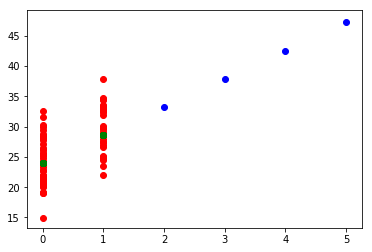

In [10]:
#Realizamos el mismo procedimiento que previamente. 
variableX = np.array(df_consumo_cerveza["Fin de Semana"]).reshape(-1, 1).astype(np.float)
variableY = df_consumo_cerveza["Consumo de cerveza (litros)"].values.astype(np.float)
        
variableX_train, variableX_test, variableY_train, variableY_test  = train_test_split(variableX, variableY, test_size = 0.2, random_state = 42)

modelo_regresion = linear_model.LinearRegression()
modelo_fitPrecipitaciones = modelo_regresion.fit(variableX_train, variableY_train)

#Predicción con varios datos.
prediccion_variableY_num_finessemana = modelo_regresion.predict(variableX_test)  
print("Coeficiente tras realizar la regresión según la variable de precipitaciones: \n", modelo_regresion.coef_)                     
print("Término independiente: \n", modelo_regresion.intercept_)                    
print("Error cuadrático medio: \n", mean_squared_error(variableY_test, prediccion_variableY_num_finessemana))    
print("Porcentaje de varianza: \n", r2_score(variableY_test, prediccion_variableY_num_finessemana))


#Creaamos la gráfica de dispersión de los datos. 
plt.scatter(variableX_test.reshape(1, len(variableX_test))[0], variableY_test, color = 'red')
plt.scatter(variableX_test.reshape(1, len(variableX_test))[0], prediccion_variableY_num_finessemana, color = 'green')

#Definimos los valores de la recta. 
valores_X_recta = np.arange(2, 6)
valores_Y_recta = valores_X_recta * modelo_regresion.coef_ + modelo_regresion.intercept_
plt.scatter(valores_X_recta, valores_Y_recta, color = 'blue')

#Dibujamos la gráfica.
plt.show()

## 4º: Explica cómo funcionaría el posible sistema creado con los parámetros descritos arriba. 

El sistema creado con los parámetros descritos arriba funcionaría evaluando el consumo de cerveza según la climatología de la ciudad y del tiempo libre (fin de semana). Así, se tendría en cuenta si hace calor, frio, llueve o si influye que no sea día laborable.  
Sirve para la predicción de los valores de una variable, a través del modelo de regresión lineal. Este modelo indica el grado de influencia de la variable que deseamos conocer con respecto al valor resultado de la ecuación. 